In [1]:
# download visualization file
import requests
url = 'https://raw.githubusercontent.com/yigitatesh/ml/main/plots.py'
r = requests.get(url)

with open('plots.py', 'w') as f:
    f.write(r.text)

In [2]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

from plots import plot_classifier, plot_decision_boundary

from scipy.stats import mode

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

# Load Mushrooms Data

In [3]:
mushrooms = pd.read_csv("https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/mushrooms.csv")
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# one hot encoding
data = pd.get_dummies(mushrooms)
data.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
# edit data and label encoding of target classes
data["edible"] = data["class_e"]
data.drop(["class_e", "class_p"], axis=1, inplace=True)
target_names=["Poisoned", "Edible"]
data.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,edible
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Reduce Data to 2D dimensions using PCA

<IPython.core.display.Javascript object>


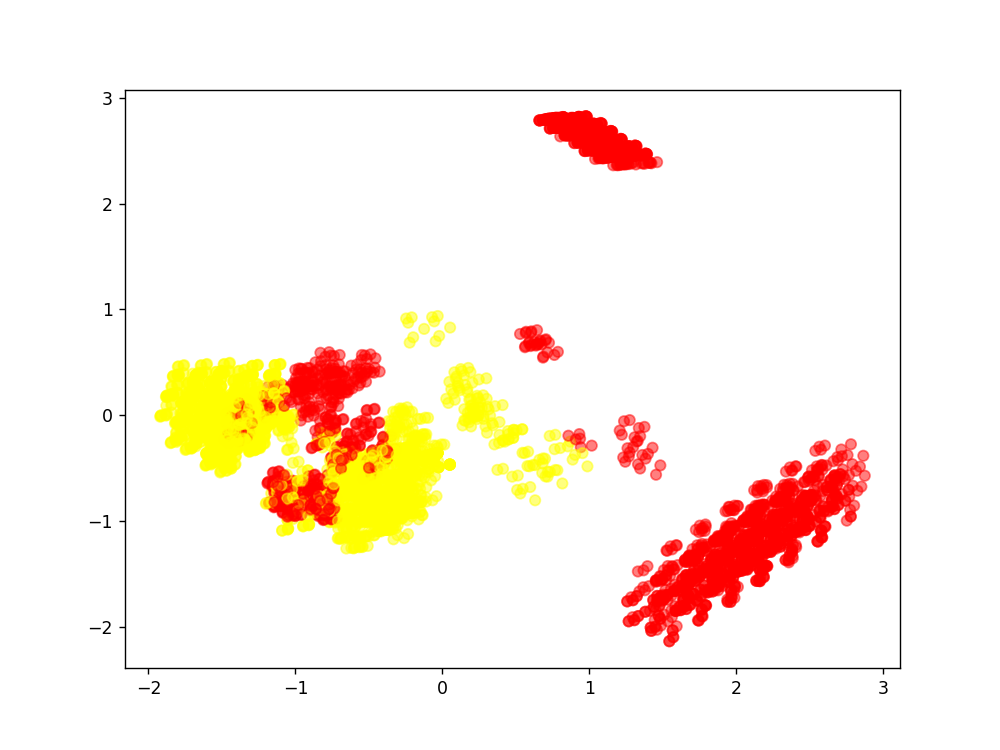

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# pca for 2d
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# train test set
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, random_state=0)

# vis
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="autumn", marker="o", alpha=0.5)

## Fit Logistic Regression to see its score

0.8788774002954209


<IPython.core.display.Javascript object>


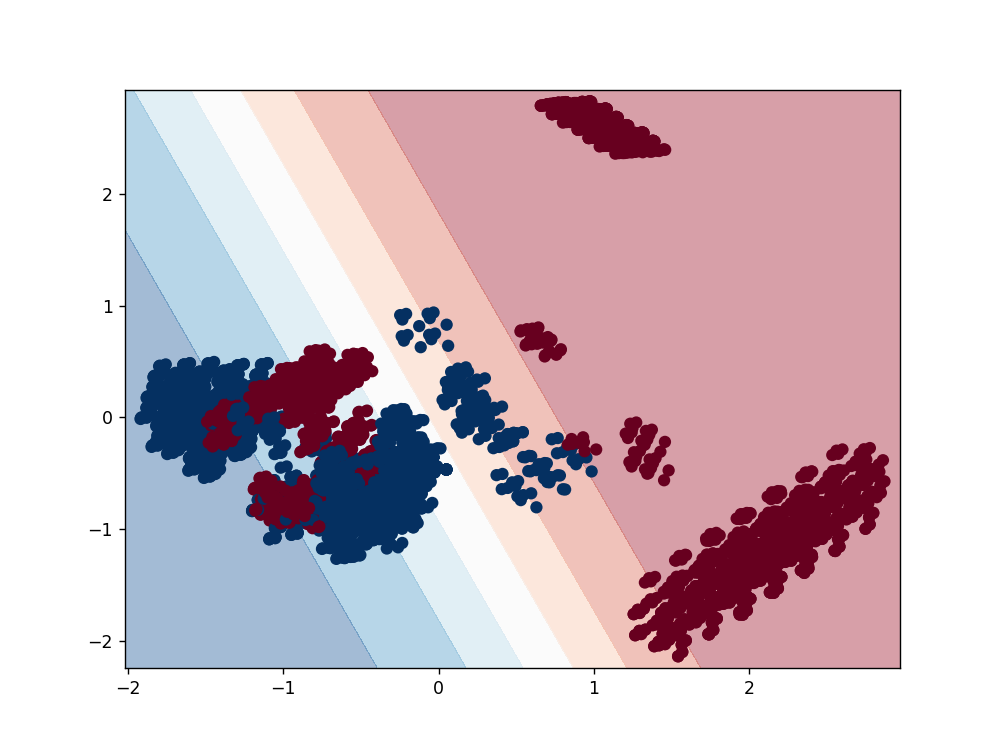

(<Figure size 800x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2db50d417c8>)

In [7]:
# logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))
plot_decision_boundary(lr, X_2d, y)

# Decision Tree Classifier

In [11]:
# Decision Tree Classifier class
class DecisionTreeClassifier:
    def __init__(self, max_depth=4, min_samples_size=5):
        self.max_depth = max_depth
        self.min_samples_size = min_samples_size
    
    def fit(self, X_train, y_train):
        self.root = self.get_best_split(X_train, y_train)
        self.split(self.root, 1)
        return self
    
    def gini_index(self, label_groups, class_set):
        """calculates gini index of splitted groups"""
        # count all samples
        n_samples = sum([len(group) for group in label_groups])
        # calculate gini index
        gini = 0.0
        for group in label_groups:
            size = len(group)
            # pass divide by 0
            if size == 0:
                continue
            
            score = 0.0
            # score for each class
            for class_name in class_set:
                p = list(group).count(class_name) / size
                score += p ** 2
            
            # weighted sum for gini index
            gini += (size / n_samples) * (1 - score)
    
        return gini
    
    def split_by_value(self, index, value, X, y):
        """splits data into left and right by a value"""
        left_indexes = X[:, index] >= value
        right_indexes = X[:, index] < value
        # create splitted data
        X_left = X[left_indexes, :]
        X_right = X[right_indexes, :]
        y_left = y[left_indexes]
        y_right = y[right_indexes]
        
        return X_left, X_right, y_left, y_right
    
    def get_best_split(self, X, y):
        """finds the best split of a data"""
        class_set = list(set(y))
        best_index, best_value, best_gini = float("inf"), float("inf"), float("inf")
        best_X_groups, best_y_groups = None, None
        # loop in features
        for index in range(X.shape[1]):
            # find feature values to split the data on each of them
            value_set = sorted(list(set(X[:, index])))
            value_set = value_set[::len(value_set)//10+1]
            # loop in values of this feature
            for value in value_set:
                X_left, X_right, y_left, y_right = self.split_by_value(index, value, X, y)
                gini = self.gini_index([y_left, y_right], class_set)
                # update best values
                if gini < best_gini:
                    best_index = index
                    best_value = value
                    best_gini = gini
                    best_X_groups = [X_left, X_right]
                    best_y_groups = [y_left, y_right]
            
        return {"index": best_index, "value": best_value, 
                "X_groups": best_X_groups, "y_groups": best_y_groups}
    
    def split(self, node, depth):
        """splits a node recursively"""
        X_left, X_right = node["X_groups"]
        y_left, y_right = node["y_groups"]
        del(node["X_groups"])
        del(node["y_groups"])
        
        # check for a no split
        if not X_left.size or not X_right.size:
            output_labels = np.concatenate((y_left.ravel(), y_right.ravel()))
            node["left"] = node["right"] = mode(output_labels)[0][0]
            return
    
        # check for max depth
        if depth >= self.max_depth:
            node["left"] = mode(y_left)[0][0]
            node["right"] = mode(y_right)[0][0]
            return
        
        # process left child
        if len(y_left) <= self.min_samples_size:
            node["left"] = mode(y_left)[0][0]
        else:
            node["left"] = self.get_best_split(X_left, y_left)
            self.split(node["left"], depth+1)
        
        # process right child
        if len(y_right) <= self.min_samples_size:
            node["right"] = mode(y_right)[0][0]
        else:
            node["right"] = self.get_best_split(X_right, y_right)
            self.split(node["right"], depth+1)
    
    def predict(self, X):
        predictions = [self._predict(self.root, row) for row in X]
        return np.array(predictions)
        
    def _predict(self, node, row):
        """recursive function predicting one data point"""
        if row[node["index"]] >= node["value"]:
            if isinstance(node["left"], dict):
                return self._predict(node["left"], row)
            else:
                return node["left"]
        
        else:
            if isinstance(node["right"], dict):
                return self._predict(node["right"], row)
            else:
                return node["right"]
    
    def score(self, X, y):
        preds = self.predict(X)
        return (y == preds).mean()

In [12]:
# fit decision tree
dt = DecisionTreeClassifier(max_depth=7, min_samples_size=5).fit(X_train, y_train)

train score: 0.9553586082389628, test score: 0.9522402757262433


<IPython.core.display.Javascript object>


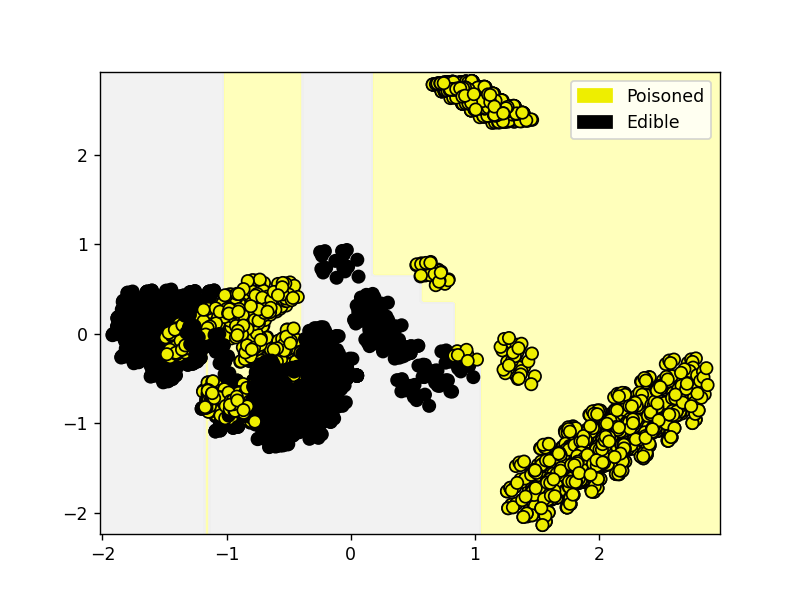

In [13]:
# evaluate and visualize the model
print("train score: {}, test score: {}".format(dt.score(X_train, y_train), dt.score(X_test, y_test)))
plot_classifier(dt, X_2d, y, target_names=target_names)

In [14]:
dt.get_best_split(X_train, y_train)

{'index': 0,
 'value': 0.169258267698531,
 'X_groups': [array([[ 0.87182236,  2.74186028],
         [ 1.19515296,  2.52059626],
         [ 2.37563277, -0.52090303],
         ...,
         [ 1.55685441, -1.84408396],
         [ 1.99095193, -1.28616322],
         [ 0.96944512,  2.72790986]]),
  array([[-1.30799534,  0.11703853],
         [-0.21855896, -0.65913279],
         [-1.54666271,  0.25818674],
         ...,
         [-0.44905155, -0.75069466],
         [-1.49095929, -0.093782  ],
         [-1.57780421,  0.31452442]])],
 'y_groups': [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
  array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)]}

# Random Forest

In [15]:
class RandomForestClassifier:
    def __init__(self, n_estimators=50, max_depth=4, min_samples_size=7):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_size = min_samples_size
    
    def fit(self, X_train, y_train):
        self.trees = []
        
        for i in range(self.n_estimators):
            # get random samples
            X_sample, y_sample = self.random_sample(X_train, y_train)
            # fit a tree
            tree = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_size=self.min_samples_size,
                                         ).fit(X_sample, y_sample)
            self.trees.append(tree)
        
        return self
    
    def random_sample(self, X, y, ratio=2/3):
        n_sample = int(len(y) * ratio)
        random_indices = np.random.choice(len(y), n_sample)
        X_sample = X[random_indices, :]
        y_sample = y[random_indices]
        return X_sample, y_sample
    
    def predict(self, X):
        predictions = []
        for row in X:
            votes = [tree.predict(np.array([row]))[0] for tree in self.trees]
            prediction = mode(votes)[0][0]
            predictions.append(prediction)
        return np.array(predictions)
    
    def score(self, X, y):
        predictions = self.predict(X)
        return (y == predictions).mean()

In [16]:
# fit Random Forest
rf = RandomForestClassifier(n_estimators=10, max_depth=7, min_samples_size=5).fit(X_train, y_train)

In [17]:
# evaluate Random Forest
print("train score: {}, test score: {}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

train score: 0.9574922041687182, test score: 0.9561792220580995


<IPython.core.display.Javascript object>


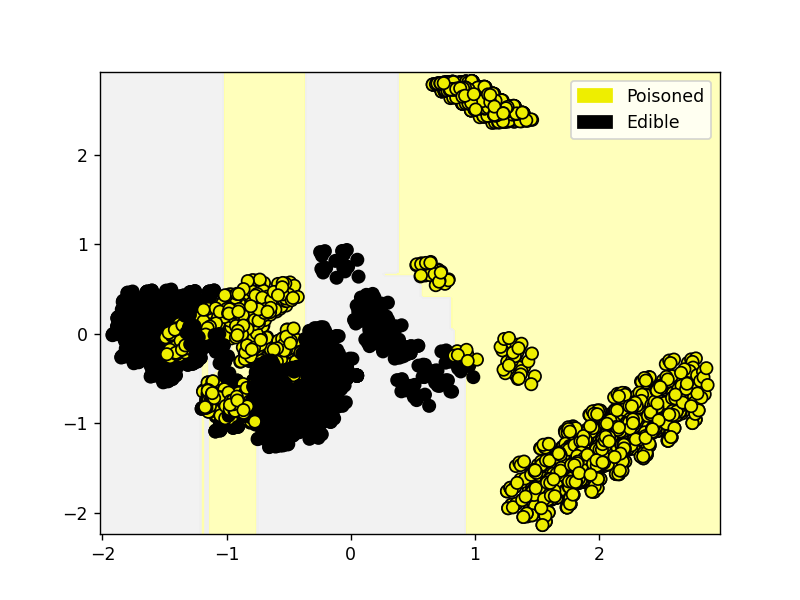

In [18]:
# visualize Random Forest
plot_classifier(rf, X_2d, y, target_names=target_names)

## Random Forest Classifier from sklearn

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=10, max_depth=11).fit(X_train, y_train)

train score: 0.9768586903003447, test score: 0.9615952732644018


<IPython.core.display.Javascript object>


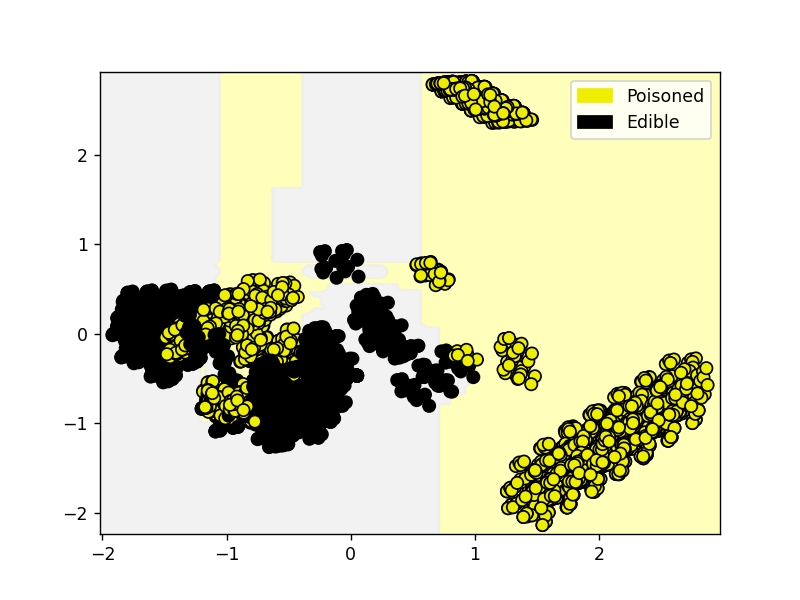

In [21]:
print("train score: {}, test score: {}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))
plot_classifier(rf, X_2d, y, target_names=target_names)

# AdaBoost Classifier

1) Assign equal weights to all data points
$$
\text{Weights} = \frac{1}{N}
$$

2) Learning and fitting trees:

        1) Fit a weak tree and predict

        2) Calculate total error
$$
\text{Error = Average of Weights of Missclassifications }
$$

        3) Calculate performance of tree
$$
Alpha = 0.5 \space . \space log(\frac{1 - Error}{Error})
$$

        4) Update Weights
$$
\text{New Weights} = \left\{
                    \begin{array}\\
                        Weights \,.\, e^{alpha} & \text{if missclassified} \\
                        Weights \,.\, e^{-alpha} & \text{if correctly classified} \\
                    \end{array}
                   \right.
\\
$$
$$
\text{=> New Weights} = \frac{Weights \,.\, e^{-alpha \,.\, y \,.\, predictions}}{\text{Sum(New Weights)}}
$$

        5) Store tree and alpha value

### alpha coefficient

<IPython.core.display.Javascript object>


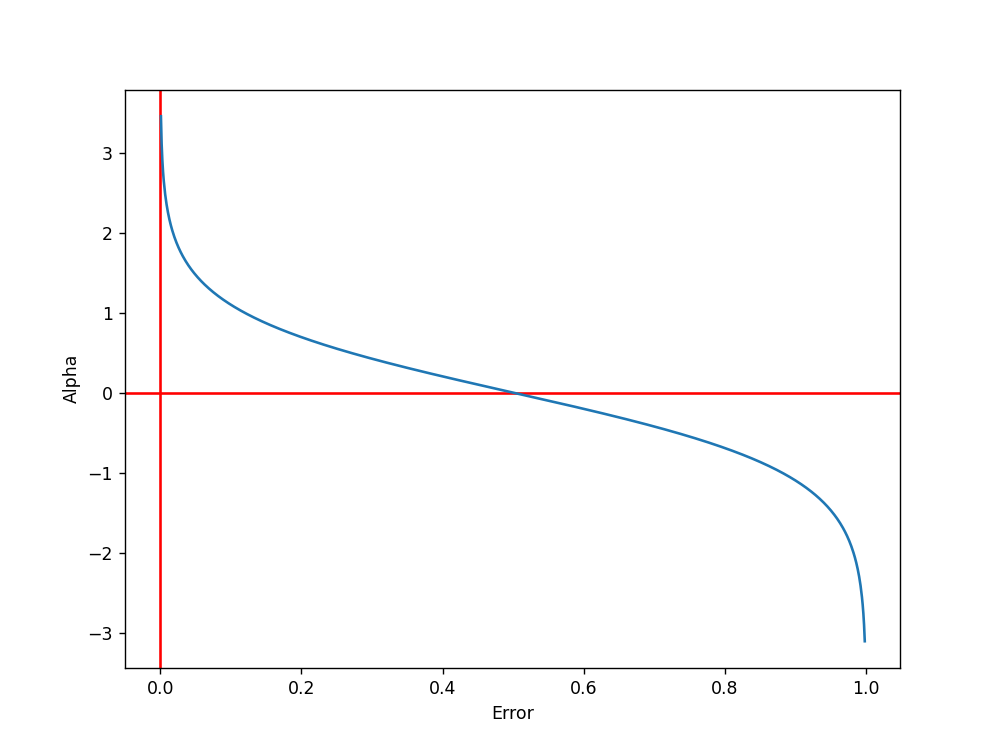

In [8]:
def alpha_f(x):
    return 0.5 * np.log((1 - x) / x)

interval = np.arange(0.001, 0.999, 0.001)
plt.figure(figsize=(8, 6))
plt.axhline(0, color="red")
plt.axvline(0, color="red")
plt.xlabel("Error")
plt.ylabel("Alpha")
plt.plot(interval, alpha_f(interval))

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
class AdaBoost:
    def __init__(self, n_learners=10):
        self.n_learners = n_learners
        self.trees = []
        self.alphas = []
    
    def fit(self, X, y):
        m = X.shape[0]
        
        sample_weights = np.ones(m) / m
        
        for i in range(self.n_learners):
            # fit a weak tree
            tree = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
            tree.fit(X, y, sample_weight=sample_weights)
            preds = tree.predict(X)
            
            # calculate error and alpha
            error = sample_weights[(preds != y)].sum() / sample_weights.sum()
            alpha = 0.5 * np.log((1 - error) / (error))
            
            # update weights
            sample_weights = sample_weights * np.exp(-alpha * y * preds)
            sample_weights /= sample_weights.sum()
            
            self.trees.append(tree)
            self.alphas.append(alpha)
        
        return self
    
    def predict(self, X):
        preds = np.zeros(X.shape[0])
        for i in range(self.n_learners):
            current_preds = self.trees[i].predict(X) * self.alphas[i]
            preds += current_preds
        return np.sign(preds)
    
    def score(self, X, y):
        preds = self.predict(X)
        return (preds == y).mean()

In [45]:
# set 0 labels to -1 (working mechanism of AdaBoost)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)
y_train[y_train == 0] = -1.0
y_test[y_test == 0] = -1.0

In [46]:
# fit AdaBoost
ada = AdaBoost(n_learners=50).fit(X_train, y_train)

In [47]:
# evaluate AdaBoost
print("train score: {}, test score: {}".format(ada.score(X_train, y_train), ada.score(X_test, y_test)))

train score: 0.9020187099950763, test score: 0.914327917282127


<IPython.core.display.Javascript object>


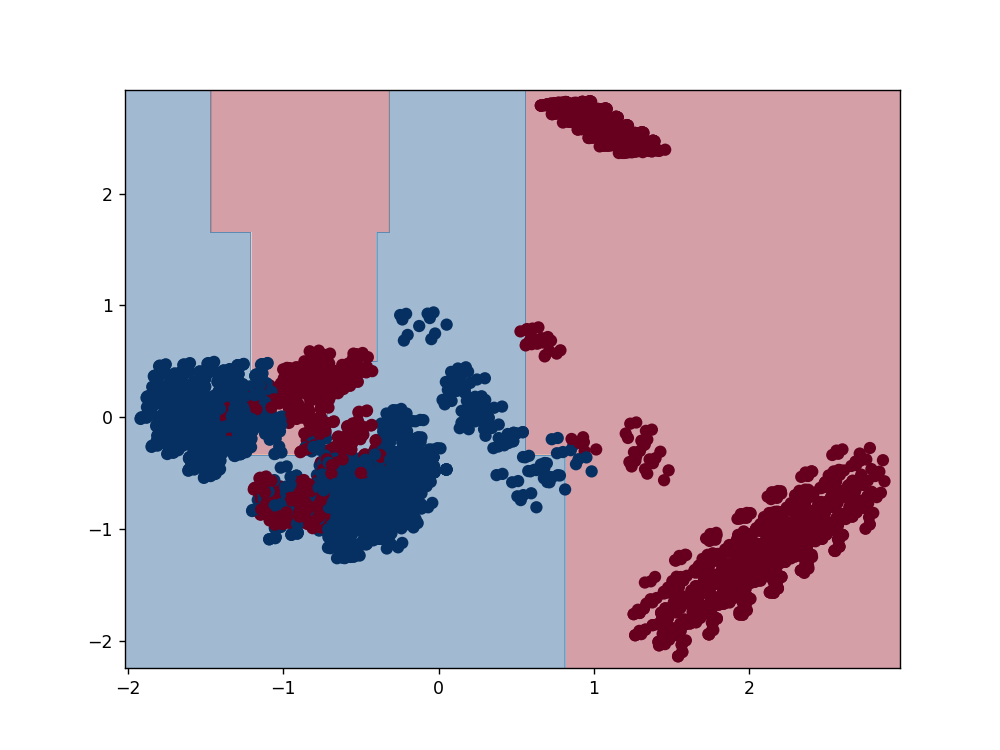

(<Figure size 800x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2db538f0a88>)

In [48]:
# visualize AdaBoost
plot_decision_boundary(ada, X_train, y_train)

train score: 0.8933202035122272, test score: 0.8995568685376661


<IPython.core.display.Javascript object>


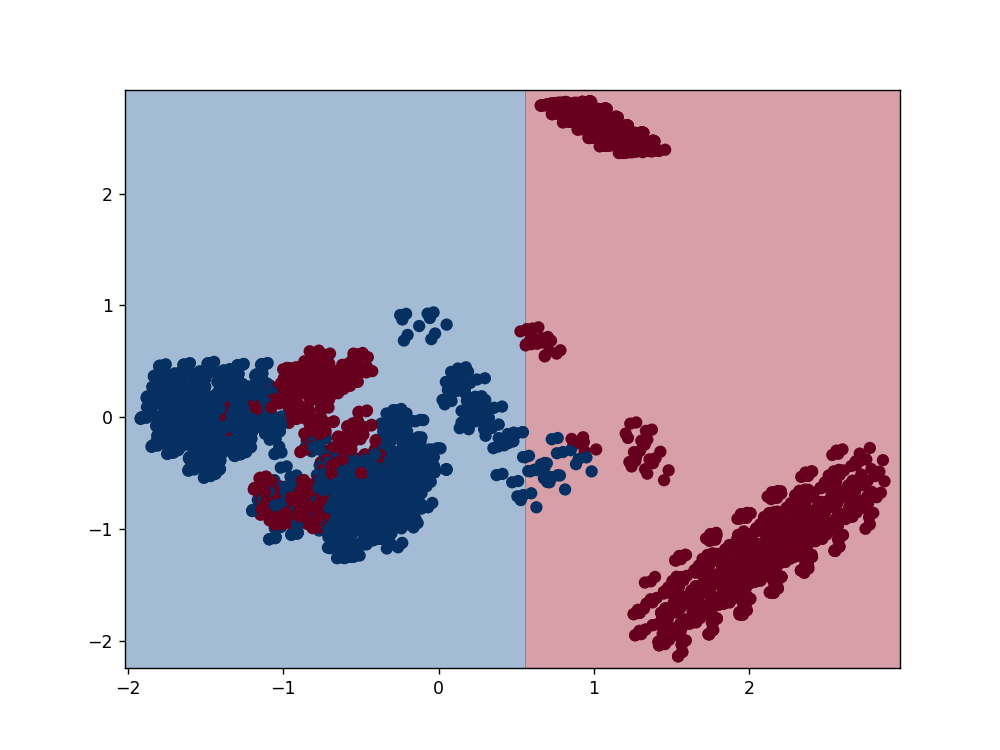

train score: 0.7482356802888561, test score: 0.7552929591334318


<IPython.core.display.Javascript object>


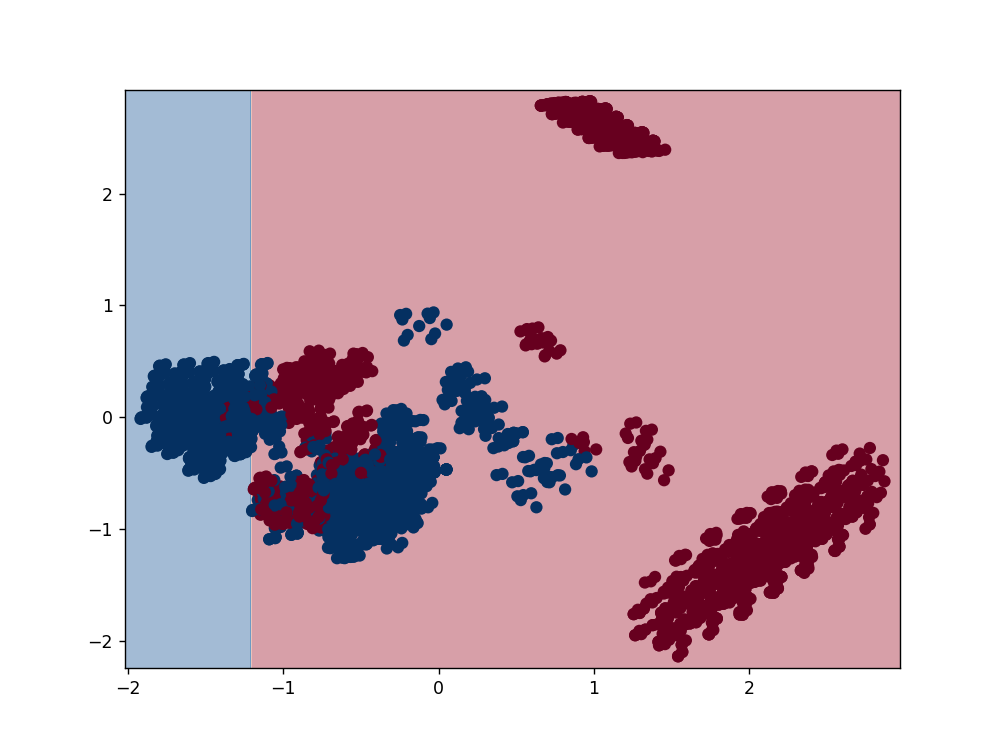

train score: 0.8275069752174626, test score: 0.8291482028557361


<IPython.core.display.Javascript object>


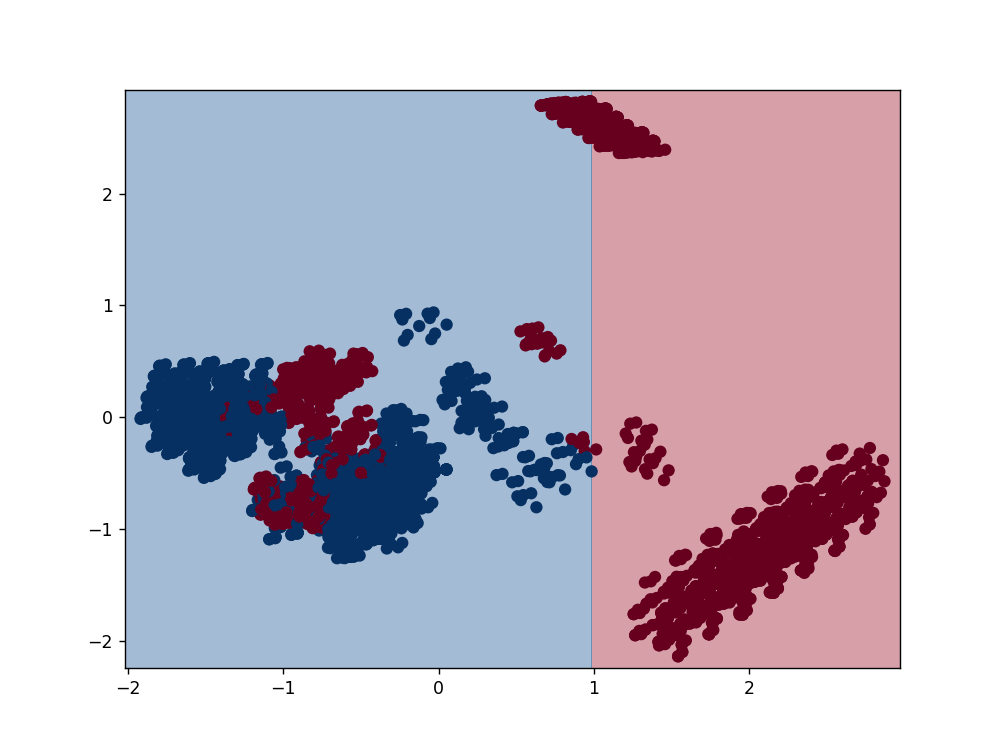

train score: 0.26292466765140327, test score: 0.24766125061546038


<IPython.core.display.Javascript object>


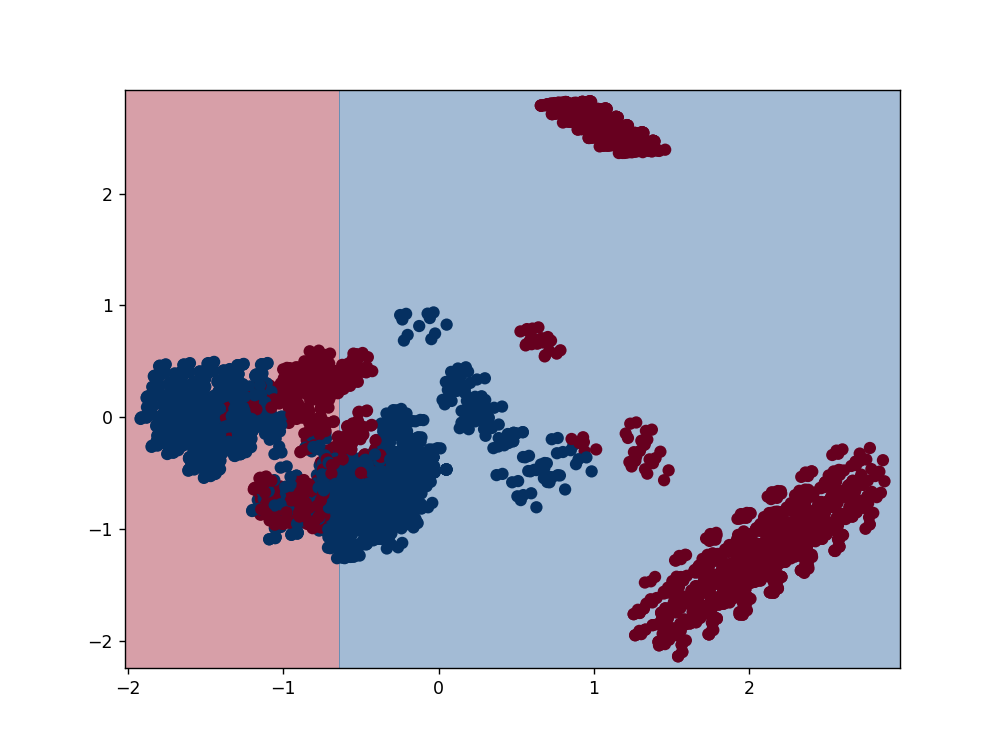

train score: 0.483505662235352, test score: 0.4775972427375677


<IPython.core.display.Javascript object>


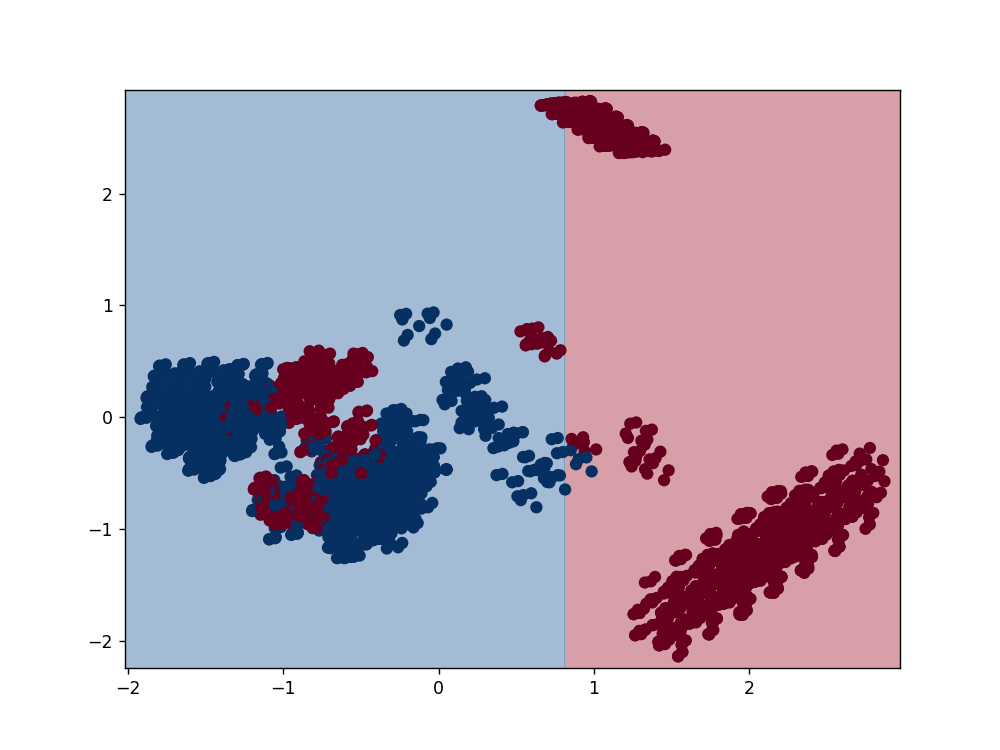

train score: 0.8746102084359101, test score: 0.879369768586903


<IPython.core.display.Javascript object>


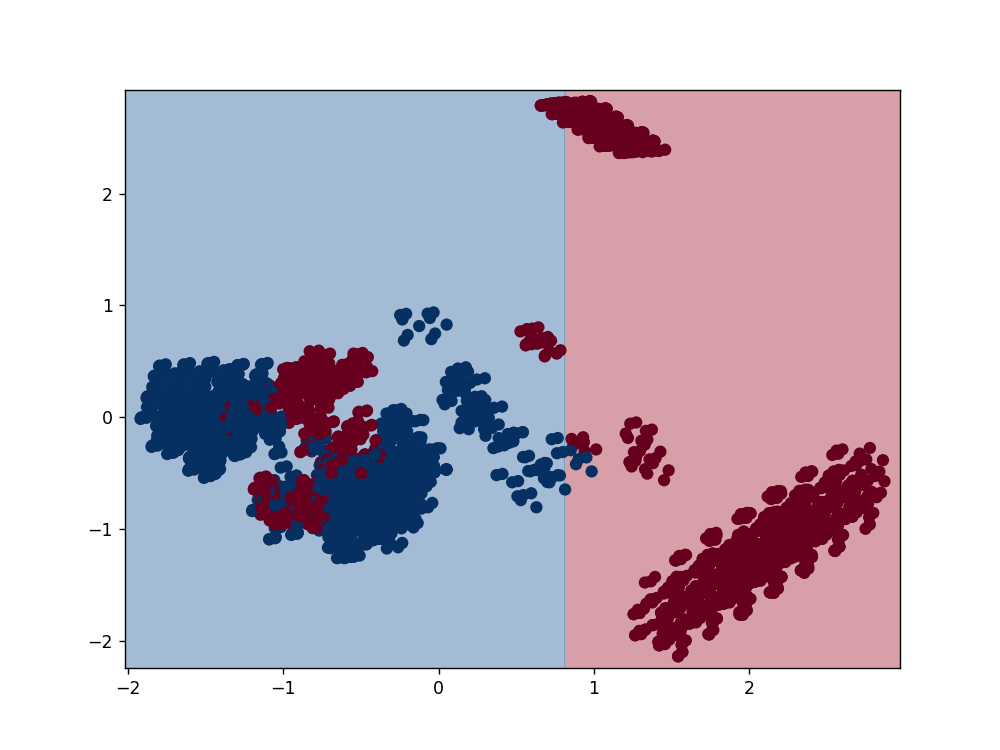

train score: 0.6482849171180043, test score: 0.6425406203840472


<IPython.core.display.Javascript object>


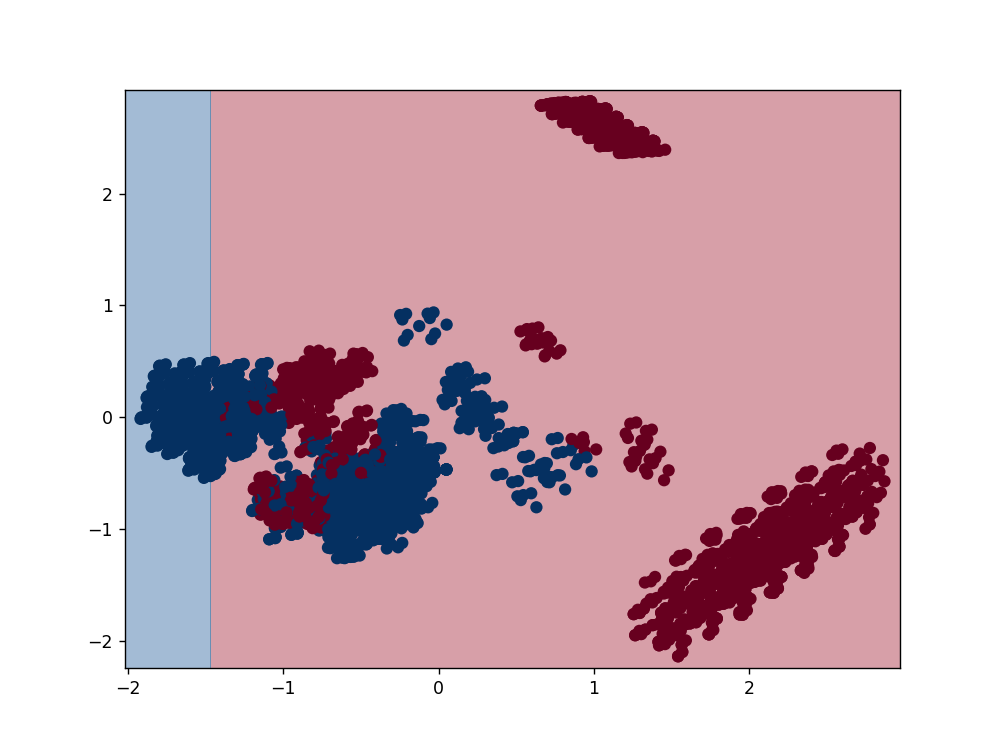

train score: 0.6674872804858034, test score: 0.6770064007877893


<IPython.core.display.Javascript object>


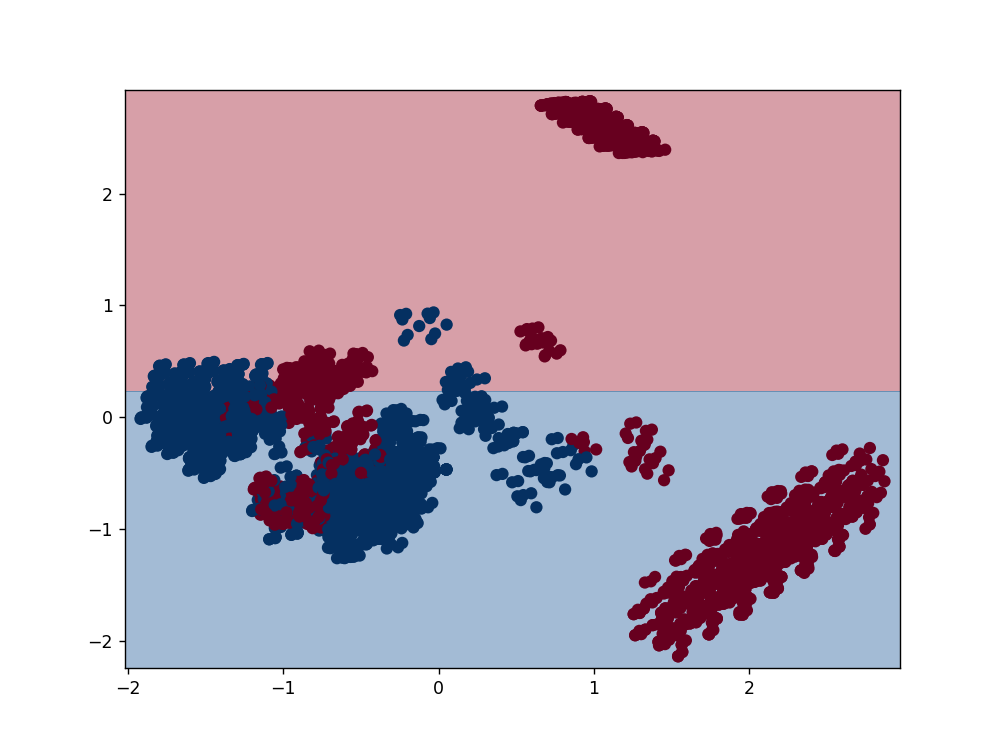

train score: 0.483505662235352, test score: 0.4775972427375677


<IPython.core.display.Javascript object>


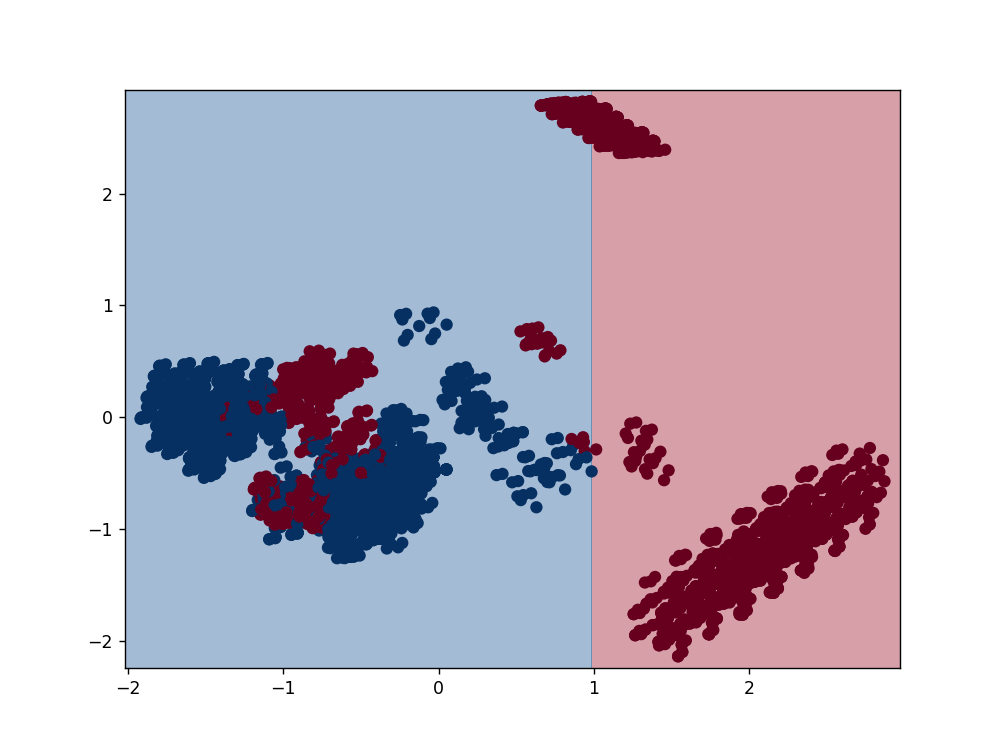

train score: 0.8275069752174626, test score: 0.8291482028557361


<IPython.core.display.Javascript object>


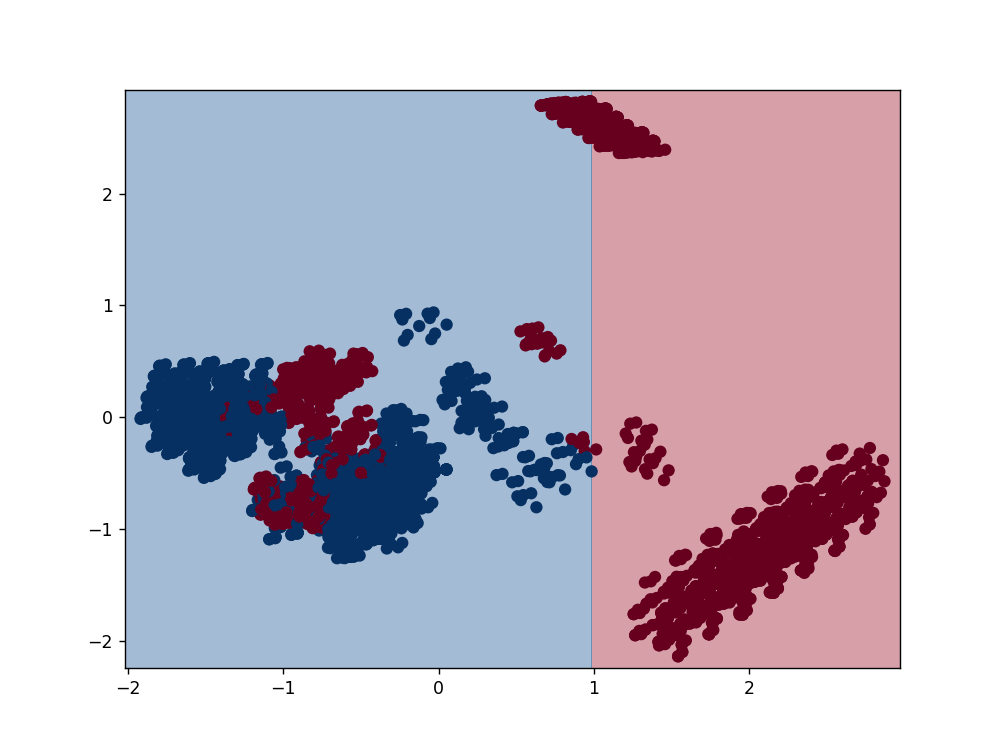

In [28]:
for tree in ada.trees[:10]:
    print("train score: {}, test score: {}".format(tree.score(X_train, y_train), tree.score(X_test, y_test)))
    plot_decision_boundary(tree, X_train, y_train)

In [49]:
# set -1 labels to 0
y_train[y_train == -1] = 0.0
y_test[y_test == -1] = 0.0
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

# Gradient Boost Classifier

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
class GradientBoostClassifier:
    def __init__(self, n_estimators=10, max_depth=6, min_samples_size=5,
                 gamma=0.2):
        self.n_estimators = n_estimators
        self.gamma = gamma
        self.max_depth = max_depth
        self.min_samples_size = min_samples_size
    
        self.trees = []
    
    def fit(self, X, y):
        preds = np.ones(y.shape) * np.mean(y)
        
        for i in range(self.n_estimators):
            # calculate gradient
            gradient = 2*(y - preds)*(-1)
            
            # fit a tree for gradients
            tree = DecisionTreeRegressor(max_depth=self.max_depth,
                                        min_samples_split=self.min_samples_size)
            tree.fit(X, gradient)
            self.trees.append(tree)
            
            # predict output
            update = tree.predict(X)
            # update predictions
            preds -= self.gamma * update
        
        return self
    
    def predict(self, X):
        preds = np.zeros(X.shape[0])
        # make predictions
        for tree in self.trees:
            update = tree.predict(X)
            preds -= self.gamma * update
            
        # threshold and turn outputs into classes
        preds = np.where(preds < 0, 0, 1)
        
        return preds
    
    def score(self, X, y):
        preds = self.predict(X)
        return (preds == y).mean()

In [52]:
# fit Gradient Boost
gb = GradientBoostClassifier(n_estimators=10, gamma=0.2, max_depth=6).fit(X_train, y_train)

In [53]:
# evaluate GB
print("train score: {}, test score: {}".format(gb.score(X_train, y_train), gb.score(X_test, y_test)))

train score: 0.9768586903003447, test score: 0.9640571147218119


<IPython.core.display.Javascript object>


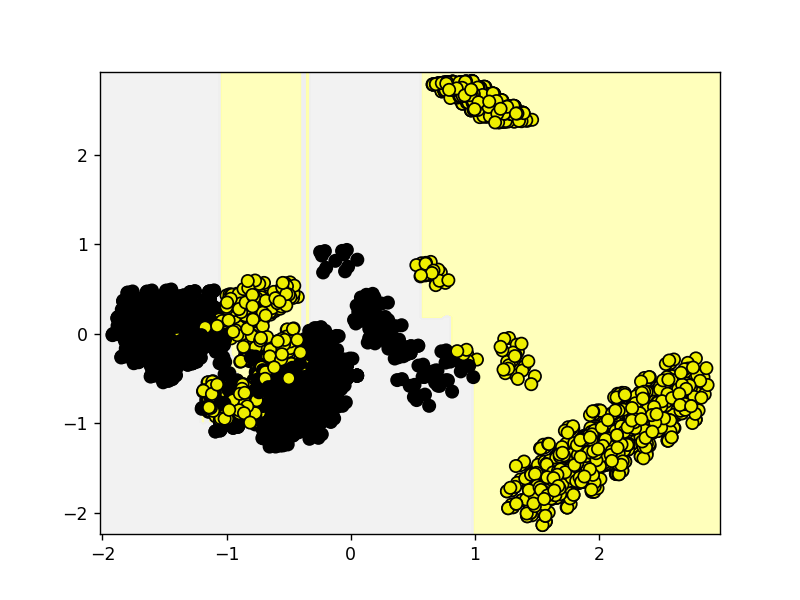

In [54]:
# visualize GB
plot_classifier(gb, X_train, y_train)

<IPython.core.display.Javascript object>


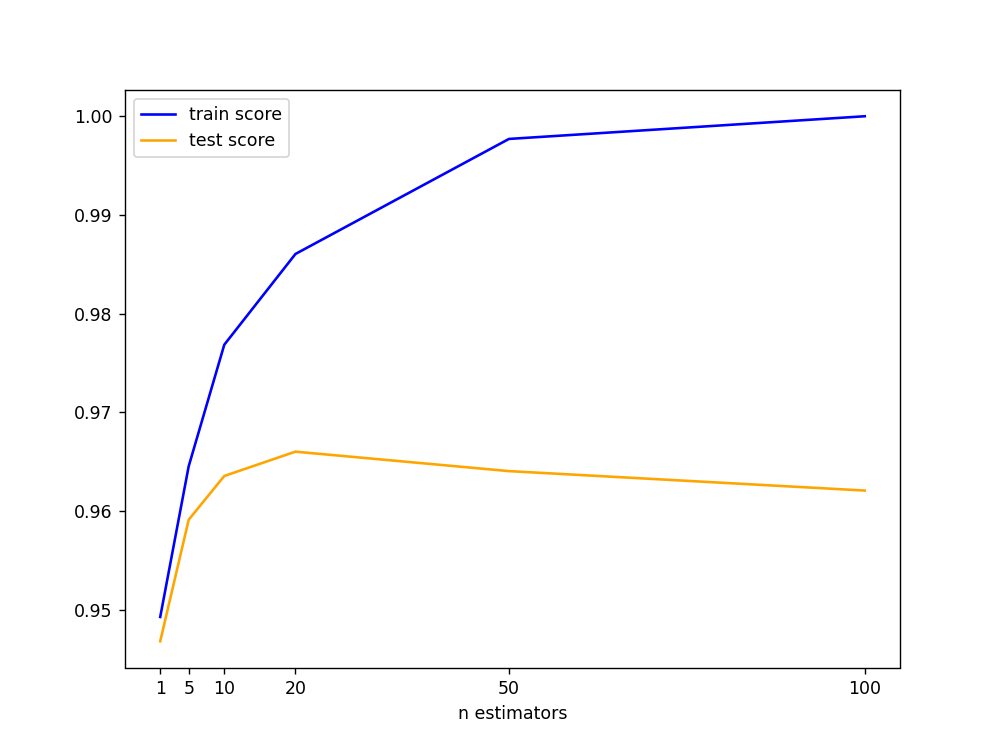

In [35]:
# fit GB for different estimator counts
train_scores, test_scores = [], []
estimators = [1, 5, 10, 20, 50, 100]
for n_estimator in estimators:
    gb = GradientBoostClassifier(n_estimators=n_estimator).fit(X_train, y_train)
    train_scores.append(gb.score(X_train, y_train))
    test_scores.append(gb.score(X_test, y_test))
    
plt.figure(figsize=(8, 6))
plt.xticks(estimators)
plt.xlabel("n estimators")
plt.plot(estimators, train_scores, color="blue", label="train score")
plt.plot(estimators, test_scores, color="orange", label="test score")
plt.legend()

# XGBoost Classifier

In [55]:
from xgboost import XGBClassifier

In [62]:
# fit XGBoost
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.4).fit(X_train, y_train, eval_set=[(X_test, y_test)],
                                                                          early_stopping_rounds=10)

[19:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.42867
[1]	validation_0-logloss:0.30150
[2]	validation_0-logloss:0.23118
[3]	validation_0-logloss:0.19171
[4]	validation_0-logloss:0.16633
[5]	validation_0-logloss:0.15010
[6]	validation_0-logloss:0.13414
[7]	validation_0-logloss:0.12532
[8]	validation_0-logloss:0.12087
[9]	validation_0-logloss:0.11726
[10]	validation_0-logloss:0.11319
[11]	validation_0-logloss:0.10973
[12]	validation_0-logloss:0.10874
[13]	validation_0-logloss:0.10815
[14]	validation_0-logloss:0.10745
[15]	validation_0-logloss:0.10454
[16]	validation_0-logloss:0.10363
[17]	validation_0-logloss:0.09987
[18]	validation_0-logloss:0.09874
[19]	validation_0-logloss:0.09730
[20]	validation_0-lo

train score: 0.9911373707533235, test score: 0.9679960610536681


<IPython.core.display.Javascript object>


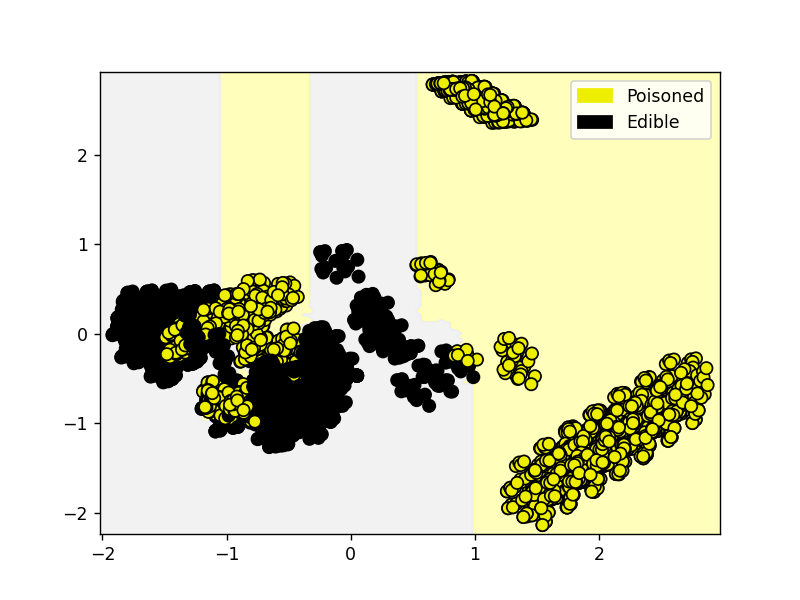

In [63]:
# evaluate and visualize XGB
print("train score: {}, test score: {}".format(xgb.score(X_train, y_train), xgb.score(X_test, y_test)))
plot_classifier(xgb, X_2d, y, target_names=target_names)